In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, recall_score, f1_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
import warnings

# Suppressing warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the breast cancer dataset
file_path = 'data.csv'
df = pd.read_csv(file_path)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Shape of the data
df.shape

(569, 33)

In [4]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Statistical summary of the data
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
# Checking for missing values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
df.drop(columns='Unnamed: 32', inplace=True) #Droping the column'Unnamed: 32'
print('Droped Column "Unnamed: 32"')
df.shape

Droped Column "Unnamed: 32"


(569, 32)

In [8]:
# Getting the categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Printing the names of all the categorical columns
print("\nCategorical Columns:", categorical_columns)

# Printing the number of categorical columns
print("\nNumber of Categorical Columns:", len(categorical_columns))


Categorical Columns: Index(['diagnosis'], dtype='object')

Number of Categorical Columns: 1


In [9]:
# Getting the unique values in the 'diagnosis' column
unique_diagnosis_values = df['diagnosis'].unique()

# Printing the unique values in the 'diagnosis' column
print("\nUnique Values in the 'diagnosis' Column:", unique_diagnosis_values)

# Getting the number of unique values in the 'diagnosis' column
num_unique_diagnosis_values = df['diagnosis'].nunique()

# Printing the number of unique values in the 'diagnosis' column
print("\nNumber of Unique Values in the 'diagnosis' Column:", num_unique_diagnosis_values)



Unique Values in the 'diagnosis' Column: ['M' 'B']

Number of Unique Values in the 'diagnosis' Column: 2


In [10]:
# One Hot Encoding the Categorical/Label Column
df = pd.get_dummies(data=df, columns=['diagnosis'], drop_first=True)
df[['diagnosis_M']].head()

,diagnosis_M
0,1
1,1
2,1
3,1
4,1


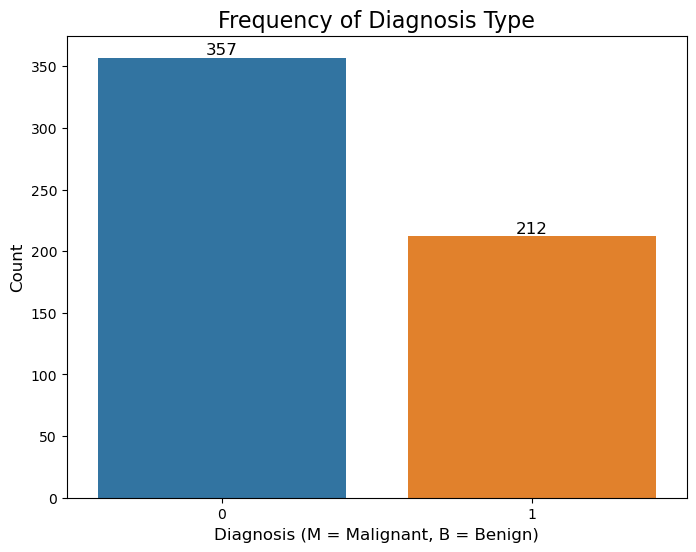

Total Values: 569


In [11]:
# Plotting a Countplot to Explore the Label Column
plt.figure(figsize=(8, 6))
sns.countplot(df['diagnosis_M']) 

# Adding a Title and Labels to the Plot
plt.title('Frequency of Diagnosis Type', fontsize=16)
plt.xlabel('Diagnosis (M = Malignant, B = Benign)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding Annotations to the Bars
counts = df['diagnosis_M'].value_counts()
for i, count in enumerate(counts):
    label = count
    plt.annotate(label, (i, count), ha='center', va='bottom', fontsize=12)

plt.show()

# Getting the Total Values
print(f'Total Values: {df.diagnosis_M.count()}')

In [12]:
#Define Features and Target Variables
X = df.drop(['diagnosis_M'], axis=1).values
y = df['diagnosis_M'].values

#Check Shape of Features and Target Variables
print(f'Shape of Features: {X.shape}')
print(f'Shape of Target: {y.shape}')

Shape of Features: (569, 31)
Shape of Target: (569,)


In [13]:
#Splitting the dataset into train and test

#Applying Train & Test split and preserving the class distribution in the train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
#Print the dimensions of the training and test data

print(f'X_train Shape: {X_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'X_test Shape: {X_test.shape}')
print(f'y_test Shape: {y_test.shape}')

X_train Shape: (455, 31)
y_train Shape: (455,)
X_test Shape: (114, 31)
y_test Shape: (114,)


In [15]:
# Applying Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
#Building the model
clf_rf = RandomForestClassifier(random_state=0)#Creating the Random Forest Classifier Model
clf_rf.fit(X_train, y_train) #Training the Model with X_train & y_train
pred = clf_rf.predict(X_test) #Predicting the X_test

#Testing the model accuracy with different paramters
acc = accuracy_score(y_test, pred) # Getting the Accuracy Score
f1 = f1_score(y_test, pred) # Getting the F1 Score
rec = recall_score(y_test, pred) # Getting the Recall Score
prec = precision_score(y_test, pred) # Getting the Precision Score
cm = confusion_matrix(y_test, pred) # Getting the Confusion Matrix

#Defining a DataFrame
rf_results = pd.DataFrame([['Random Forest Classifier', acc, f1, rec, prec]],
columns=['Model', 'Accuracy Score', 'F1 Score', 'Recall Score', 'Precision Score'])

#Printing the Model Results with different Metrics
print(rf_results)

                      Model  Accuracy Score  F1 Score  Recall Score  \
0  Random Forest Classifier        0.964912  0.956522       0.93617   

   Precision Score  
0         0.977778  
